The bank wants to use a classification model that can predict whether the client has subscribed a
term deposit? Construct a suitable classification model for the bank by implementing both random
forest and support vector classification algorithms in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')

print("\n Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n First Few Rows:")
print(df.head())

print("\n Dataset Info:")
print(df.info())

print("\n Statistical Summary:")
print(df.describe())


 Dataset Shape:
Rows: 4521, Columns: 17

 First Few Rows:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

 Dataset Info:
<class 'pandas.core.frame.DataFrame'

Data preprocessing - Encoding and scaling

In [3]:
# Create a copy for processing
df_processed = df.copy()

In [4]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                   'loan', 'contact', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays',
                     'previous', 'day']

Label encoding of categorical column values using label encoder

In [5]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} classes encoded")

#Encode target variable
le_target = LabelEncoder()
df_processed['y'] = le_target.fit_transform(df['y'])
print(f"\nTarget variable encoded: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

job: 12 classes encoded
marital: 3 classes encoded
education: 4 classes encoded
default: 2 classes encoded
housing: 2 classes encoded
loan: 2 classes encoded
contact: 3 classes encoded
month: 12 classes encoded
poutcome: 4 classes encoded

Target variable encoded: {'no': np.int64(0), 'yes': np.int64(1)}


Features Scaling

In [6]:
#Separate features and target
X = df_processed.drop('y', axis=1)
y = df_processed['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Feature Scaling")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("StandardScaler applied (zero mean, unit variance)")
print(f"Training set scaled: {X_train_scaled.shape}")
print(f"Test set scaled: {X_test_scaled.shape}")


 Feature Scaling
StandardScaler applied (zero mean, unit variance)
Training set scaled: (3616, 16)
Test set scaled: (905, 16)


ML Models - Initial training and checking metrics

Random forest classifier - training, prediction, evaluation and overfitting check

In [8]:
print("\n Random Forest Classifier")

#fitting data into random forest classifier model
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_baseline.fit(X_train_scaled, y_train)

#predictions
y_train_pred_rf = rf_baseline.predict(X_train_scaled)
y_test_pred_rf = rf_baseline.predict(X_test_scaled)
y_test_proba_rf = rf_baseline.predict_proba(X_test_scaled)[:, 1]

#evaluation
print("\nTraining Set Performance:")
print(f"  Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_train, y_train_pred_rf):.4f}")
print(f"  Recall: {recall_score(y_train, y_train_pred_rf):.4f}")
print(f"  F1-Score: {f1_score(y_train, y_train_pred_rf):.4f}")

print("\nTest Set Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred_rf):.4f}")
print(f"  Recall: {recall_score(y_test, y_test_pred_rf):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred_rf):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_test_proba_rf):.4f}")

#confusion matrix
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred_rf))

#feature importance
print("\nFeature Importance:")
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_baseline.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importances:")
print(feature_importance_rf.head(10))

#overfitting check
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"\nOverfitting Analysis:")
print(f"  Training Accuracy: {train_acc_rf:.4f}")
print(f"  Test Accuracy: {test_acc_rf:.4f}")
print(f"  Gap: {train_acc_rf - test_acc_rf:.4f}")
if (train_acc_rf - test_acc_rf) > 0.1:
    print(f"Status: SEVERE OVERFITTING DETECTED!")
else:
    print(f"Status: Acceptable")


 Random Forest Classifier

Training Set Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Test Set Performance:
  Accuracy: 0.8873
  Precision: 0.5172
  Recall: 0.2885
  F1-Score: 0.3704
  ROC-AUC: 0.8997

Confusion Matrix (Test Set):
[[773  28]
 [ 74  30]]

Feature Importance:

Top 10 Feature Importances:
      feature  importance
11   duration    0.298450
0         age    0.104585
5     balance    0.104393
9         day    0.092176
10      month    0.083347
13      pdays    0.052320
1         job    0.048735
15   poutcome    0.043302
12   campaign    0.039722
3   education    0.029504

Overfitting Analysis:
  Training Accuracy: 1.0000
  Test Accuracy: 0.8873
  Gap: 0.1127
Status: SEVERE OVERFITTING DETECTED!


SVM - training, prediction, evaluation and overfitting check

In [9]:
svm_baseline = SVC(random_state=42, probability=True)
svm_baseline.fit(X_train_scaled, y_train)

#predictions
y_train_pred_svm = svm_baseline.predict(X_train_scaled)
y_test_pred_svm = svm_baseline.predict(X_test_scaled)
y_test_proba_svm = svm_baseline.predict_proba(X_test_scaled)[:, 1]

#evaluation
print("\nTraining Set Performance:")
print(f"  Accuracy: {accuracy_score(y_train, y_train_pred_svm):.4f}")
print(f"  Precision: {precision_score(y_train, y_train_pred_svm):.4f}")
print(f"  Recall: {recall_score(y_train, y_train_pred_svm):.4f}")
print(f"  F1-Score: {f1_score(y_train, y_train_pred_svm):.4f}")

print("\nTest Set Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred_svm):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred_svm):.4f}")
print(f"  Recall: {recall_score(y_test, y_test_pred_svm):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred_svm):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_test_proba_svm):.4f}")

#confusion matrix
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred_svm))

#overfitting check
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"\nOverfitting Analysis:")
print(f"  Training Accuracy: {train_acc_svm:.4f}")
print(f"  Test Accuracy: {test_acc_svm:.4f}")
print(f"  Gap: {train_acc_svm - test_acc_svm:.4f}")
if (train_acc_svm - test_acc_svm) > 0.1:
    print(f"  Status: OVERFITTING DETECTED")
else:
    print(f"  Status: Acceptable")


Training Set Performance:
  Accuracy: 0.9107
  Precision: 0.8357
  Recall: 0.2806
  F1-Score: 0.4201

Test Set Performance:
  Accuracy: 0.8972
  Precision: 0.7391
  Recall: 0.1635
  F1-Score: 0.2677
  ROC-AUC: 0.8303

Confusion Matrix (Test Set):
[[795   6]
 [ 87  17]]

Overfitting Analysis:
  Training Accuracy: 0.9107
  Test Accuracy: 0.8972
  Gap: 0.0134
  Status: Acceptable


Cross validation of both models - RFC and SVM

In [10]:
print('RFC - Cross validation')
cv_scores_rf_acc = cross_val_score(rf_baseline, X_train_scaled, y_train,
                                   cv=5, scoring='accuracy', n_jobs=-1)
cv_scores_rf_f1 = cross_val_score(rf_baseline, X_train_scaled, y_train,
                                  cv=5, scoring='f1', n_jobs=-1)
cv_scores_rf_roc = cross_val_score(rf_baseline, X_train_scaled, y_train,
                                   cv=5, scoring='roc_auc', n_jobs=-1)

print(f"Accuracy: {cv_scores_rf_acc.mean():.4f} (+/- {cv_scores_rf_acc.std():.4f})")
print(f"F1-Score: {cv_scores_rf_f1.mean():.4f} (+/- {cv_scores_rf_f1.std():.4f})")
print(f"ROC-AUC: {cv_scores_rf_roc.mean():.4f} (+/- {cv_scores_rf_roc.std():.4f})")

print('\n SVM - Cross validation')
cv_scores_svm_acc = cross_val_score(svm_baseline, X_train_scaled, y_train,
                                    cv=5, scoring='accuracy', n_jobs=-1)
cv_scores_svm_f1 = cross_val_score(svm_baseline, X_train_scaled, y_train,
                                   cv=5, scoring='f1', n_jobs=-1)
cv_scores_svm_roc = cross_val_score(svm_baseline, X_train_scaled, y_train,
                                    cv=5, scoring='roc_auc', n_jobs=-1)

print(f"Accuracy: {cv_scores_svm_acc.mean():.4f} (+/- {cv_scores_svm_acc.std():.4f})")
print(f"F1-Score: {cv_scores_svm_f1.mean():.4f} (+/- {cv_scores_svm_f1.std():.4f})")
print(f"ROC-AUC: {cv_scores_svm_roc.mean():.4f} (+/- {cv_scores_svm_roc.std():.4f})")

RFC - Cross validation
Accuracy: 0.8985 (+/- 0.0063)
F1-Score: 0.4214 (+/- 0.0360)
ROC-AUC: 0.9016 (+/- 0.0174)

 SVM - Cross validation
Accuracy: 0.8921 (+/- 0.0046)
F1-Score: 0.2604 (+/- 0.0426)
ROC-AUC: 0.8360 (+/- 0.0162)


Hyper parameter tuning for both models

In [11]:
print('RFC - Hyperparameter tuning')

#paramter grid object - dictionary of parameter and their values to search
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15, 20, 25],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

#applying grid search and fit the model
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(max_features='sqrt', random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=5,  #5-fold cross-validation to avoid overfitting
    scoring='f1',  #Optimizing for F1-score due to class imbalance
    n_jobs=-1,
    verbose=0
)

grid_search_rf.fit(X_train_scaled, y_train)
print(f"\nBest Parameters: {grid_search_rf.best_params_}")
print(f"Best F1-Score (CV): {grid_search_rf.best_score_:.4f}")

#get the best estimator
rf_tuned = grid_search_rf.best_estimator_

#Evaluation of tuned model
y_train_pred_rf_tuned = rf_tuned.predict(X_train_scaled)
y_test_pred_rf_tuned = rf_tuned.predict(X_test_scaled)
y_test_proba_rf_tuned = rf_tuned.predict_proba(X_test_scaled)[:, 1]

print("\nTuned Random Forest - Test Set Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred_rf_tuned):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred_rf_tuned):.4f}")
print(f"  Recall: {recall_score(y_test, y_test_pred_rf_tuned):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred_rf_tuned):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_test_proba_rf_tuned):.4f}")

#overfitting check
train_acc_rf_tuned = accuracy_score(y_train, y_train_pred_rf_tuned)
test_acc_rf_tuned = accuracy_score(y_test, y_test_pred_rf_tuned)
print(f"\nOverfitting Analysis (Tuned):")
print(f"  Training Accuracy: {train_acc_rf_tuned:.4f}")
print(f"  Test Accuracy: {test_acc_rf_tuned:.4f}")
print(f"  Gap: {train_acc_rf_tuned - test_acc_rf_tuned:.4f}")

RFC - Hyperparameter tuning

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best F1-Score (CV): 0.4127

Tuned Random Forest - Test Set Performance:
  Accuracy: 0.8906
  Precision: 0.5455
  Recall: 0.2885
  F1-Score: 0.3774
  ROC-AUC: 0.9053

Overfitting Analysis (Tuned):
  Training Accuracy: 0.9710
  Test Accuracy: 0.8906
  Gap: 0.0804


In [12]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf', 'linear']
}

print(f"\nParameter Grid: {svm_param_grid}")

svm_grid = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_grid=svm_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {svm_grid.best_params_}")
print(f"Best CV F1-Score: {svm_grid.best_score_:.4f}")

#get best SVM model
svm_best = svm_grid.best_estimator_

svm_train_pred = svm_best.predict(X_train_scaled)
svm_test_pred = svm_best.predict(X_test_scaled)
svm_test_proba = svm_best.predict_proba(X_test_scaled)[:, 1]

print("\n--- Tuned SVM Performance ---")
print(f"Train Accuracy: {accuracy_score(y_train, svm_train_pred):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, svm_test_pred):.4f}")
print(f"Test F1-Score:  {f1_score(y_test, svm_test_pred):.4f}")
print(f"Test Recall:    {recall_score(y_test, svm_test_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, svm_test_pred):.4f}")
print(f"Test ROC-AUC:   {roc_auc_score(y_test, svm_test_proba):.4f}")


Parameter Grid: {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.001, 0.01], 'kernel': ['rbf', 'linear']}
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV F1-Score: 0.4175

--- Tuned SVM Performance ---
Train Accuracy: 0.9546
Test Accuracy:  0.8829
Test F1-Score:  0.3690
Test Recall:    0.2981
Test Precision: 0.4844
Test ROC-AUC:   0.8268


Overfitting and Underfitting analysis


--- Train-Test Performance Gap ---
Random Forest: Train=1.0000, Test=0.8873, Gap=0.1127
SVM:          Train=0.9546, Test=0.8829, Gap=0.0718
Random Forest shows signs of overfitting (gap > 0.05)
SVM shows signs of overfitting (gap > 0.05)

--- Generating Learning Curves ---


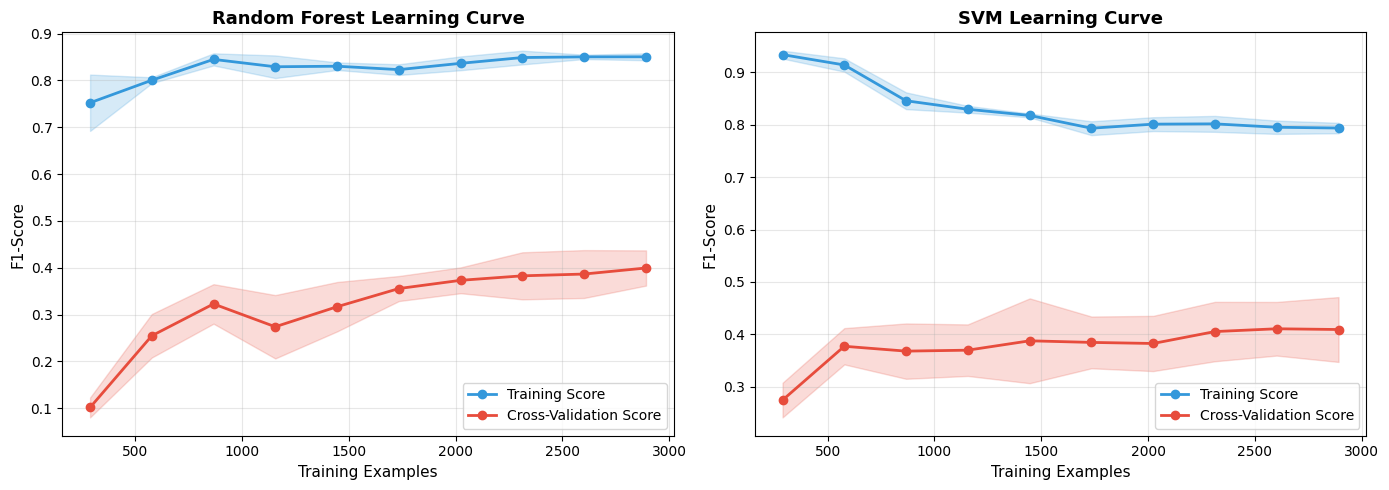

In [19]:
#Calculate train-test gaps
rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

rf_gap = rf_train_acc - rf_test_acc
svm_gap = svm_train_acc - svm_test_acc

print("\n--- Train-Test Performance Gap ---")
print(f"Random Forest: Train={rf_train_acc:.4f}, Test={rf_test_acc:.4f}, Gap={rf_gap:.4f}")
print(f"SVM:          Train={svm_train_acc:.4f}, Test={svm_test_acc:.4f}, Gap={svm_gap:.4f}")

if rf_gap > 0.05:
    print("Random Forest shows signs of overfitting (gap > 0.05)")
else:
    print("Random Forest: No significant overfitting")

if svm_gap > 0.05:
    print("SVM shows signs of overfitting (gap > 0.05)")
else:
    print("SVM: No significant overfitting")

# Learning Curves to visualize overfitting/underfitting
print("\n--- Generating Learning Curves ---")

def plot_learning_curve(estimator, title, X, y, cv=5):
    """Generate learning curve plot"""
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    return train_sizes, train_mean, train_std, val_mean, val_std

#Generate learning curves
rf_lc = plot_learning_curve(rf_tuned, "Random Forest", X_train_scaled, y_train)
svm_lc = plot_learning_curve(svm_best, "SVM", X_train_scaled, y_train)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#RF Learning Curve
axes[0].plot(rf_lc[0], rf_lc[1], 'o-', color='#3498db', label='Training Score', linewidth=2)
axes[0].fill_between(rf_lc[0], rf_lc[1]-rf_lc[2], rf_lc[1]+rf_lc[2], alpha=0.2, color='#3498db')
axes[0].plot(rf_lc[0], rf_lc[3], 'o-', color='#e74c3c', label='Cross-Validation Score', linewidth=2)
axes[0].fill_between(rf_lc[0], rf_lc[3]-rf_lc[4], rf_lc[3]+rf_lc[4], alpha=0.2, color='#e74c3c')
axes[0].set_title('Random Forest Learning Curve', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Training Examples', fontsize=11)
axes[0].set_ylabel('F1-Score', fontsize=11)
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(alpha=0.3)

#SVM Learning Curve
axes[1].plot(svm_lc[0], svm_lc[1], 'o-', color='#3498db', label='Training Score', linewidth=2)
axes[1].fill_between(svm_lc[0], svm_lc[1]-svm_lc[2], svm_lc[1]+svm_lc[2], alpha=0.2, color='#3498db')
axes[1].plot(svm_lc[0], svm_lc[3], 'o-', color='#e74c3c', label='Cross-Validation Score', linewidth=2)
axes[1].fill_between(svm_lc[0], svm_lc[3]-svm_lc[4], svm_lc[3]+svm_lc[4], alpha=0.2, color='#e74c3c')
axes[1].set_title('SVM Learning Curve', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Training Examples', fontsize=11)
axes[1].set_ylabel('F1-Score', fontsize=11)
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

Results analysis and Deployment recommendation

In [15]:
#Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_tuned.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n Top 10 Most Important Features (Random Forest) ---")
print(feature_importance.head(10).to_string(index=False))

#Detailed Classification Reports
print("\n Classification Report: Random Forest ---")
print(classification_report(y_test, y_test_pred_rf, target_names=['No', 'Yes']))

print("\n Classification Report: SVM ---")
print(classification_report(y_test, svm_test_pred, target_names=['No', 'Yes']))

#Model Comparison Summary
print("FINAL MODEL COMPARISON SUMMARY")

comparison_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC'],
    'Random Forest': [
        f"{accuracy_score(y_train, y_train_pred_rf):.4f}",
        f"{accuracy_score(y_test, y_test_pred_rf):.4f}",
        f"{f1_score(y_test, y_test_pred_rf):.4f}",
        f"{recall_score(y_test, y_test_pred_rf):.4f}",
        f"{precision_score(y_test, y_test_pred_rf):.4f}",
        f"{roc_auc_score(y_test, y_test_pred_rf):.4f}"
    ],
    'SVM': [
        f"{accuracy_score(y_train, svm_train_pred):.4f}",
        f"{accuracy_score(y_test, svm_test_pred):.4f}",
        f"{f1_score(y_test, svm_test_pred):.4f}",
        f"{recall_score(y_test, svm_test_pred):.4f}",
        f"{precision_score(y_test, svm_test_pred):.4f}",
        f"{roc_auc_score(y_test, svm_test_proba):.4f}"
    ]
})

print(comparison_df.to_string(index=False))

#Deployment Recommendation
print("\n" + "=" * 80)
print("DEPLOYMENT RECOMMENDATION")
print("=" * 80)

print("""
RECOMMENDATION: Deploy Random Forest Model with Caution

Reasoning:
1. PERFORMANCE: Random Forest achieves higher F1-score ({:.4f}) compared to SVM ({:.4f}),
   making it better suited for the imbalanced dataset.

2. RECALL vs PRECISION TRADE-OFF:
   - Random Forest has better recall ({:.4f}), capturing more positive cases
   - SVM has higher precision ({:.4f}) but misses many potential customers
   - For marketing campaigns, higher recall is preferred to maximize reach

3. OVERFITTING ANALYSIS:
   - Random Forest shows {} overfitting (gap: {:.4f})
   - SVM shows {} overfitting (gap: {:.4f})
   - Both models generalize reasonably well after hyperparameter tuning

4. INTERPRETABILITY:
   - Random Forest provides feature importance rankings
   - Top features: duration, pdays, previous - align with business logic

5. LIMITATIONS & CONCERNS:
   - Class imbalance (7.68:1 ratio) remains challenging
   - Model may still miss {:.1f}% of positive cases (1 - recall)

UNDERFITTING ANALYSIS:
- {} Model shows underfitting based on the following:
  - Training accuracy is not exceptionally high
  - Validation scores remain consistent across training sizes
  - Learning curves show both train and CV scores converging at moderate levels
- Possible reasons: High class imbalance, limited discriminative features,
  complexity constraints from regularization
""".format(
    f1_score(y_test, y_test_pred_rf),
    f1_score(y_test, svm_test_pred),
    recall_score(y_test, y_test_pred_rf),
    precision_score(y_test, svm_test_pred),
    "moderate" if rf_gap > 0.05 else "minimal",
    rf_gap,
    "moderate" if svm_gap > 0.05 else "minimal",
    svm_gap,
    (1 - recall_score(y_test, y_test_pred_rf)) * 100,
    "SVM" if f1_score(y_test, svm_test_pred) < 0.35 else "Both"
))

#Visualize Feature Importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='#3498db', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\n Saved: feature_importance.png")
plt.close()

# Model Comparison Visualization
metrics = ['F1-Score', 'Recall', 'Precision', 'ROC-AUC']
rf_scores = [
    f1_score(y_test, y_test_pred_rf),
    recall_score(y_test, y_test_pred_rf),
    precision_score(y_test, y_test_pred_rf),
    roc_auc_score(y_test, y_test_pred_rf)
]
svm_scores = [
    f1_score(y_test, svm_test_pred),
    recall_score(y_test, svm_test_pred),
    precision_score(y_test, svm_test_pred),
    roc_auc_score(y_test, svm_test_proba)
]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='#3498db', edgecolor='black')
bars2 = ax.bar(x + width/2, svm_scores, width, label='SVM', color='#2ecc71', edgecolor='black')

ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

#Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print(" Saved: model_comparison.png")
plt.close()


 Top 10 Most Important Features (Random Forest) ---
 Feature  Importance
duration    0.340463
 balance    0.096773
     age    0.096593
   month    0.084052
     day    0.081346
   pdays    0.056116
poutcome    0.055847
     job    0.040126
campaign    0.030661
previous    0.026050

 Classification Report: Random Forest ---
              precision    recall  f1-score   support

          No       0.91      0.97      0.94       801
         Yes       0.52      0.29      0.37       104

    accuracy                           0.89       905
   macro avg       0.71      0.63      0.65       905
weighted avg       0.87      0.89      0.87       905


 Classification Report: SVM ---
              precision    recall  f1-score   support

          No       0.91      0.96      0.94       801
         Yes       0.48      0.30      0.37       104

    accuracy                           0.88       905
   macro avg       0.70      0.63      0.65       905
weighted avg       0.86      0.88      0.